# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [9]:
import pandas as pd
data =pd.read_csv(r"C:\Users\rana_\OneDrive\Bureau\Nouveau dossier (3)\Classeur1.csv", sep =';')
data


,tudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

Draw a dispersion diagram (scatter plot) for the data.

In [11]:
# Your code here.
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values =[10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


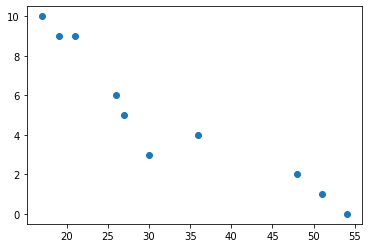

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(x = student_data['X'], y = student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [14]:
# Your response here. 
#There is a negative correlation between age and number of tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
covMatrix = np.cov(student_data,bias=True)
covMatrix

array([[ 12.25,  87.5 ,  38.5 ,  21.  ,  56.  ,  80.5 ,  17.5 ,  35.  ,
         94.5 ,  47.25],
       [ 87.5 , 625.  , 275.  , 150.  , 400.  , 575.  , 125.  , 250.  ,
        675.  , 337.5 ],
       [ 38.5 , 275.  , 121.  ,  66.  , 176.  , 253.  ,  55.  , 110.  ,
        297.  , 148.5 ],
       [ 21.  , 150.  ,  66.  ,  36.  ,  96.  , 138.  ,  30.  ,  60.  ,
        162.  ,  81.  ],
       [ 56.  , 400.  , 176.  ,  96.  , 256.  , 368.  ,  80.  , 160.  ,
        432.  , 216.  ],
       [ 80.5 , 575.  , 253.  , 138.  , 368.  , 529.  , 115.  , 230.  ,
        621.  , 310.5 ],
       [ 17.5 , 125.  ,  55.  ,  30.  ,  80.  , 115.  ,  25.  ,  50.  ,
        135.  ,  67.5 ],
       [ 35.  , 250.  , 110.  ,  60.  , 160.  , 230.  ,  50.  , 100.  ,
        270.  , 135.  ],
       [ 94.5 , 675.  , 297.  , 162.  , 432.  , 621.  , 135.  , 270.  ,
        729.  , 364.5 ],
       [ 47.25, 337.5 , 148.5 ,  81.  , 216.  , 310.5 ,  67.5 , 135.  ,
        364.5 , 182.25]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
# Your response here.
from scipy import stats
X = student_data['X']
Y = student_data['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) #intercept when x=0, slope the coeficient  of X
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))


The slope is: -0.24282077091598084
The intercept is: 12.88880336313577


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='X', ylabel='Y'>

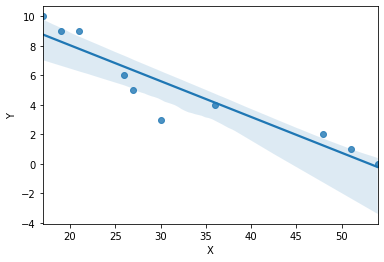

In [23]:
# Your code here.
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="X", y ="Y", data= student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [24]:
# Your response here. 
import statsmodels.api as sm

X = sm.add_constant(student_data.X) # We must add the intercept using the add_constant function
Y = student_data.Y

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           5.57e-05
Time:                        11:47:13   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\rana_\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#GOOD PREDICTIVE MODEL BECAUSE R-SQUARRE 0.88 AND PROB(F-Statistic)< 0.05
#The regression model fits the data better than the model with no independent variables.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
# Import any libraries you may need & the data
data = pd.read_csv(r'C:\Users\rana_\IronhackDA\DAFT_212\module_2\Lab_16_Linear-Regression\vehicles.csv')

data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [26]:
# Your response here. 
data.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [ ]:
#Variables particularly important for CO2 Emission Grams/Mile: Engine Displacement, Cylinders, Fuel Barrels/Year, City MPG, Highway MPG, Combined MPG, Fuel Cost/Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your response here. 
X = sm.add_constant(data[['Engine Displacement', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG', 'Fuel Cost/Year']]) 

Y = data['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.982
Model:                                 OLS   Adj. R-squared:                  0.982
Method:                      Least Squares   F-statistic:                 3.303e+05
Date:                     Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                             12:04:27   Log-Likelihood:            -1.5045e+05
No. Observations:                    35952   AIC:                         3.009e+05
Df Residuals:                        35945   BIC:                         3.010e+05
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [28]:
# Your code here. 
X=[1, 3, 4, 6, 8, 9, 11, 14]
Y=[1, 2, 4, 4, 5, 7, 8, 13]


data = pd.DataFrame({'X': X, 'Y': Y})
data


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

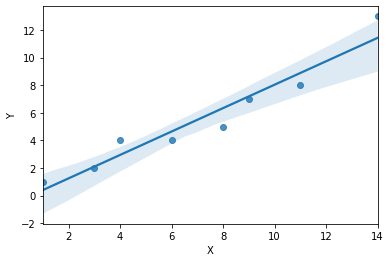

In [29]:
# Your code here.
sns.regplot(x="X", y="Y", data=data)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [30]:
# Your response here. 
import statsmodels.api as sm 

X = sm.add_constant(data.X) 
Y = data.Y

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           0.000102
Time:                        12:10:53   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\rana_\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [35]:
# Your response here. 
data1 = data.drop([6, 1])
data1

,X,Y
0,1,1
2,4,4
3,6,4
4,8,5
5,9,7
7,14,13


<AxesSubplot:xlabel='X', ylabel='Y'>

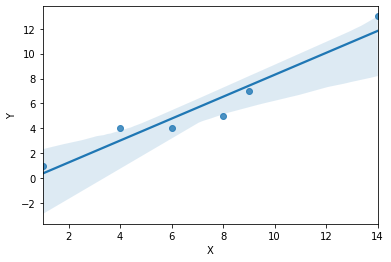

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="X", y="Y", data=data1) 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [37]:
# Your response here. 
X = sm.add_constant(data1.X) 
Y = data1.Y

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     52.56
Date:                Mon, 28 Mar 2022   Prob (F-statistic):            0.00192
Time:                        12:23:56   Log-Likelihood:                -8.4598
No. Observations:                   6   AIC:                             20.92
Df Residuals:                       4   BIC:                             20.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4933      0.984     -0.502      0.6

C:\Users\rana_\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
#The model still good